In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [153]:
#Load the data set
df = pd.read_csv("mobile_crash_data_0927_v3.csv")
print(df)

          App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0          Netflix  35.473619     52.048420      30.172434    22.554281   
1          Twitter  98.132710     35.675450      42.987039    50.852821   
2          Discord  61.316465     60.209320      33.431911    42.385092   
3            Slack  86.208830     52.385562      65.454958    48.859789   
4           Amazon  77.266467     57.531209       3.687373    47.114118   
...            ...        ...           ...            ...          ...   
11555  Google Maps  89.834407     61.401764     122.810369    31.082843   
11556       Amazon  50.210780     49.393401     110.043715    14.901975   
11557      Netflix  60.857851     71.204257     129.408817    21.294194   
11558         Uber  72.522893     39.601110     115.882346    45.646152   
11559     Snapchat  75.175787     36.511043     136.678449    33.987108   

       Disk_Space  Network_Signal  App_Version  Error_Logs Device_Model  \
0      484.092409       

In [154]:
# Summary statistics - 
#This will do find mean and Quantiles finding central tendencies and dispersion
print("\nSummary Statistics:")
print(df.describe(include='all'))



Summary Statistics:
       App_Name     CPU_Usage  Memory_Usage  Battery_Level   Temperature  \
count     11560  11329.000000  11329.000000   11560.000000  11329.000000   
unique       15           NaN           NaN            NaN           NaN   
top     Discord           NaN           NaN            NaN           NaN   
freq        807           NaN           NaN            NaN           NaN   
mean        NaN     62.397586     56.959348      50.304638     36.832064   
std         NaN     16.272409      9.880617      28.954965      9.403873   
min         NaN      4.310223     24.027532       0.000000     10.115146   
25%         NaN     51.389702     50.215708      25.270028     31.205169   
50%         NaN     62.486420     56.980808      50.390288     37.597585   
75%         NaN     73.819859     63.572382      74.859107     43.533911   
max         NaN     99.952131     94.278519     149.286188     55.000000   

          Disk_Space  Network_Signal   App_Version    Error_Logs D

In [155]:
# In above summary Battery Level max is showing percentage as 149.286188, 
#while max percentage can only be 100

#Find number of records greater than 100 for Battery Level and remove those

In [160]:
# Find records greater than 100 in 'Battery Level'
outliers = df[df['Battery_Level'] > 100]
print("\nRecords greater than 100:")
print(outliers)

# Remove records greater than 100
cleaned_data = df[df['Battery_Level'] <= 100]

outliers = cleaned_data[cleaned_data['Battery_Level'] > 100]
print("\nRecords greater than 100:")
print(outliers)


Records greater than 100:
          App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
11548  Google Maps  48.011931     58.748810     149.286188    42.857147   
11549  Google Maps  65.887411     41.890789     146.987775    29.509652   
11550    Instagram  60.731433     83.903662     138.980624    32.345326   
11551     Snapchat  47.562555     58.257913     141.555246    31.934551   
11552      Netflix  61.236555     46.871596     139.083107    46.182101   
11553     Telegram  82.449084     63.896671     142.135888    19.950297   
11554      Spotify  49.956265     54.270078     112.648205    23.982544   
11555  Google Maps  89.834407     61.401764     122.810369    31.082843   
11556       Amazon  50.210780     49.393401     110.043715    14.901975   
11557      Netflix  60.857851     71.204257     129.408817    21.294194   
11558         Uber  72.522893     39.601110     115.882346    45.646152   
11559     Snapchat  75.175787     36.511043     136.678449    33.987108  

In [161]:
# Checking for missing values
print("\nMissing Values:")
print(cleaned_data.isnull().sum())


Missing Values:
App_Name                        0
CPU_Usage                     231
Memory_Usage                  231
Battery_Level                   0
Temperature                   231
Disk_Space                      0
Network_Signal                  0
App_Version                     0
Error_Logs                      0
Device_Model                    0
Session_Time                    0
Num_App_Crashes                 0
Duration_Since_Last_Charge      0
App_Usage_Level                 0
Crash_Label                     0
dtype: int64


In [177]:
# Impute missing values by replacing with mean
cleaned_data['CPU_Usage']=cleaned_data['CPU_Usage'].fillna(cleaned_data['CPU_Usage'].mean())

cleaned_data['Memory_Usage']=cleaned_data['Memory_Usage'].fillna(cleaned_data['Memory_Usage'].median())

cleaned_data['Temperature']=cleaned_data['Temperature'].ffill()

print("\nMissing Values:")
print(cleaned_data.isnull().sum())

## round to 2 decimal digit
cleaned_data = cleaned_data.round(2)


Missing Values:
App_Name                      0
CPU_Usage                     0
Memory_Usage                  0
Battery_Level                 0
Temperature                   0
Disk_Space                    0
Network_Signal                0
App_Version                   0
Error_Logs                    0
Device_Model                  0
Session_Time                  0
Num_App_Crashes               0
Duration_Since_Last_Charge    0
App_Usage_Level               0
Crash_Label                   0
dtype: int64


In [170]:
# 1. Distance binning
# Formula -> interval = (max-min) / Number of Bins
# Let us consider the 'Battery Level' continuous value column for binning
min_value = cleaned_data['Battery_Level'].min()
max_value = cleaned_data['Battery_Level'].max()
print(min_value)
print(max_value)

# Suppose the bin size is 5
# linspace returns evenly spaced numbers over a specified interval. 
# Returns num evenly spaced samples, calculated over the interval [start, stop].
bins = np.linspace(min_value,max_value,7)
print(bins)

0.0
100.0
[  0.          16.66666667  33.33333333  50.          66.66666667
  83.33333333 100.        ]


In [171]:
labels = ['Extreme Low', 'Very Low', 'Low', 'Moderate', 'Sufficient', 'Full'];

# We need to specify the bins and the labels.
cleaned_data['Battery_Level'] = pd.cut(cleaned_data['Battery_Level'], bins=bins, labels=labels, include_lowest=True)
print(cleaned_data['Battery_Level'])


0           Very Low
1                Low
2                Low
3           Moderate
4        Extreme Low
            ...     
11543           Full
11544       Very Low
11545     Sufficient
11546       Moderate
11547           Full
Name: Battery_Level, Length: 11548, dtype: category
Categories (6, object): ['Extreme Low' < 'Very Low' < 'Low' < 'Moderate' < 'Sufficient' < 'Full']


In [181]:

## Use Label Encoder to make all categorical attributes as numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
cleaned_data['App_Usage_Level']=le.fit_transform(cleaned_data['App_Usage_Level'])

cleaned_data['Device_Model']=le.fit_transform(cleaned_data['Device_Model'])

cleaned_data['App_Name']=le.fit_transform(cleaned_data['App_Name'])

cleaned_data['Battery_Level']=le.fit_transform(cleaned_data['Battery_Level'])

# Validate if now all attributes are numerical
print("\nData Types:")
print(cleaned_data.dtypes)

print(cleaned_data)


Data Types:
App_Name                        int64
CPU_Usage                     float64
Memory_Usage                  float64
Battery_Level                   int64
Temperature                   float64
Disk_Space                    float64
Network_Signal                float64
App_Version                   float64
Error_Logs                      int64
Device_Model                    int64
Session_Time                  float64
Num_App_Crashes                 int64
Duration_Since_Last_Charge    float64
App_Usage_Level                 int64
Crash_Label                   float64
dtype: object
       App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0             6      35.47         52.05              5        22.55   
1            11      98.13         35.68              2        50.85   
2             1      61.32         60.21              2        42.39   
3             7      86.21         52.39              3        48.86   
4             0      77.27         57.53   

Pearson correlation: 0.594


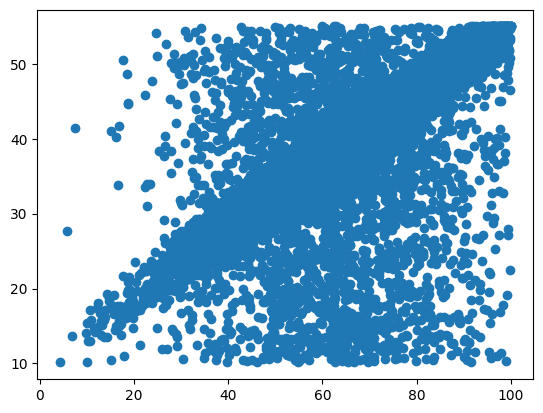

In [182]:
from scipy.stats import pearsonr
# Convert dataframe into series
list1 = cleaned_data['CPU_Usage']
list2 = cleaned_data['Temperature']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearson correlation: %.3f' % corr)

# Pearson correlation: 0.205 (Moderate Positive correlation)
# Interpretaton:
# As the CPU usage of the device increases, heat also increases

# Draw a Plot of the relationship
# 'CPU' on the X Axis and 'Memory' on the Y axis
from matplotlib import pyplot
pyplot.scatter(list1, list2)
pyplot.show()

In [183]:
# Normalize Numerical Data
# copy the data
df_min_max_scaled = cleaned_data.copy()

# Loop through each numerical column
for column in df_min_max_scaled.select_dtypes(include=['int64', 'float64']).columns:
    min_val = df[column].min()
    max_val = df[column].max()
    df_min_max_scaled[column] = (df[column] - min_val) / (max_val - min_val)

# Display the normalized DataFrame
print("\nNormalized DataFrame:")
print(df_min_max_scaled)


Normalized DataFrame:
       App_Name  CPU_Usage  Memory_Usage  Battery_Level  Temperature  \
0      0.428571   0.325834      0.398868       0.291201     0.277134   
1      0.785714   0.980977      0.165804       0.419537     0.907604   
2      0.071429   0.596038      0.515036       0.325729     0.718950   
3      0.500000   0.856305      0.403667       0.653043     0.863201   
4      0.000000   0.762806      0.476914       0.027834     0.824309   
...         ...        ...           ...            ...          ...   
11543  0.285714   0.723357      0.482809       0.854840     0.422202   
11544  0.857143   0.629282      0.323689       0.164802     0.560952   
11545  0.285714   0.274414      0.786581       0.830441     0.884449   
11546  0.000000   0.347792      0.340397       0.659914     0.281663   
11547  0.500000   0.668278      0.506244       0.998943     0.249410   

       Disk_Space  Network_Signal  App_Version  Error_Logs  Device_Model  \
0        0.945619        0.773844   

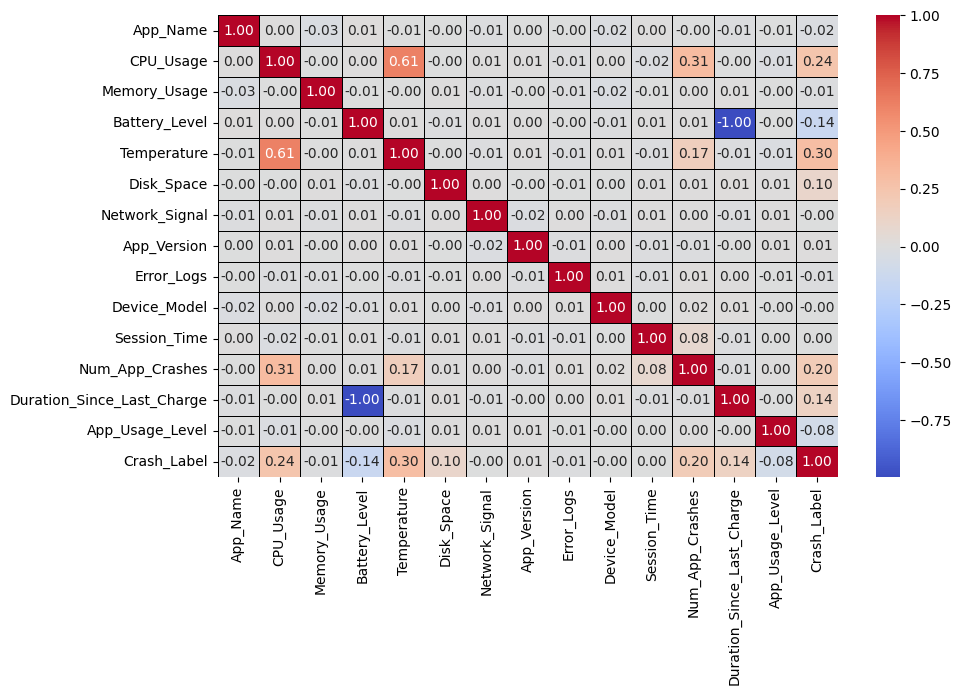

In [184]:
from tkinter import TRUE 
# Correlation Matrix - Internally uses Pearson Correlation
cor = df_min_max_scaled.corr()

# Plotting Heatmap
plt.figure(figsize = (10,6))
#sns.heatmap(cor, annot=True)
sns.heatmap(
    cor,
    annot=True,              # Annotate cells with their values
    fmt=".2f",              # Format for annotation
    cmap='coolwarm',        # Color map
    cbar=True,              # Show color bar
    linewidths=.5,          # Lines between cells
    linecolor='black',       # Color of the lines
    square=False,            # Make cells square-shaped
    xticklabels=True,       # Show x-tick labels
    yticklabels=True        # Show y-tick labels
)
plt.show()